This work represents a finalized Capstone Report for my Master's of Science in Data Analytics from Western Governors University (WGU). To comply with WGU's academic integrity guidelines, the present document was not submitted as part of my Capstone. Rather, this report represents an extension of the project that showcases my work without making my submitted materials publicly available.

{{< pagebreak >}}

## Abstract

The growth of data science as a field has produced simultaneous increases in role diversification. The present study further characterized differences between job roles by examining whether experience levels varied between data science job categories. This study focused on a subset of publicly available data comprising data science employees working full-time in the U.S. (*N* = 12,389). A Chi-Square Test of Independence with subsequent post hoc tests analyzed the association between experience level and job category. A Random Forest Regression model was used to predict salaries from experience level, job category, and work setting. Experience level composition varied between job categories (*X^2^* = 1003.54, *p* \< .001), with each job category differing from all others (*p*-range: *p* \< .001 - *p* = .001). Residual analysis revealed two experience level-job category intersections with substantially greater observed counts than expected: executive employees in leadership roles and entry-level employees in data analysis roles. Employees in these experience levels were otherwise underrepresented, whereas senior employees comprised a sizable portion of each job category. The Random Forest Regression model explained roughly 25% of the variance in employee salary. Salary estimates were higher for employees in machine learning or AI-related roles or senior positions, and lower for employees in data analysis roles. This study further characterized differences between data science roles, most notably for experience levels typically found in each. These findings have implications for the accessibility of these roles, particularly for entry-level employees, who may have fewer attainable job roles.

{{< pagebreak >}}

## 1: Introduction and Research Question

After being heralded as the "sexiest job of the 21st century" [@davenport2012], the data scientist role met these lofty expectations [@davenport2022], and is expected to continue growing through 2032 [@datasci2024]. The responsibilities of this role grew simultaneously, requiring more specialized data science roles be created to focus on a portion of the data science process [@davenport2022]. Examples of these expanded roles include the data engineer and data analyst [@rosidi2023], with the former focusing on the quality and accessibility of data and the latter focusing on analysis and reporting of data. Yet with seemingly more job roles, demand, and resources to learn data science than ever [@davenport2022], many of those attempting to break into the field find themselves frustrated and disillusioned [@selvaraj2022].

This mismatch between the expectations and experiences of data science hopefuls underscores the need to characterize the skills and experiences necessary to succeed in a data science role. Greater transparency surrounding these factors would demystify the field as a whole and provide a better road map for employment-ready data science professionals. Using an open dataset on data science jobs from Kaggle [@zangari], this study sought to discern whether there was a categorical association between experience level and job category in data science jobs. Following a statistically significant Chi-Square Test of Independence omnibus test, the experience level composition of individual job categories would be compared using the same Chi-Square test. An additional Random Forest Regression (RFR) model was used to estimate salary from experience level, job category, and work setting.

### 1.1: Research Question and Hypotheses

Does experience level composition vary between data science job categories?

Null Hypothesis (H~0~): The proportion of employees at each experience level does not vary between job categories in the dataset.

Alternative Hypothesis (H~A~): The proportion of employees at each experience level varies between job categories in the dataset.

## 2: Data Collection

This data used in this study is publicly available on Kaggle [@zangari]. The data was originally collected and compiled by @getafu2024, and features responses from data science professionals and employers. The main adaptation made in the Kaggle version was the addition of the `job_categories` feature, which collapsed 149 unique job titles into ten general categories. This was highly advantageous for the scope of this study, as it would be difficult to compare and interpret differences between 149 different job titles.

In [1]:
# import useful libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

In [2]:
# read in csv file as dataframe
job_df = pd.read_csv('../data/jobs_in_data_2024.csv')

### 2.1: Exploratory Data Analysis

The dataset contained 14,199 records without any missing values for any columns. The chronological range of responses began in 2020, with some responses as recent as this year (i.e., 2024). Since some features pertained to similar constructs (e.g., `job_title` and `job_category`), it was important to gauge the usability of features and levels therein. For instance, some features had a large number of levels (e.g., `job_title`, `employee_residence`, and `company_location`), which can be difficult to analyze. Additionally, features like `employment_type`, `employee_residence`, and `company_location` exhibited considerable categorical imbalances, with the vast majority of responses belonging to one category.

In [3]:
# get initial info for df
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [4]:
# get number of unique values for each variable 
for column in job_df.columns:
    print(column, len(job_df[column].value_counts()))

work_year 5
experience_level 4
employment_type 4
job_title 149
salary 2229
salary_currency 12
salary_in_usd 2578
employee_residence 86
work_setting 3
company_location 74
company_size 3
job_category 10


In [5]:
# get value counts for each object variable
for column in job_df.columns:
    if job_df[column].dtype == object:
        print(job_df[column].value_counts(), "\n")

experience_level
Senior         9381
Mid-level      3339
Entry-level    1063
Executive       416
Name: count, dtype: int64 

employment_type
Full-time    14139
Contract        26
Part-time       22
Freelance       12
Name: count, dtype: int64 

job_title
Data Engineer                    3059
Data Scientist                   2910
Data Analyst                     2120
Machine Learning Engineer        1488
Research Scientist                454
                                 ... 
Data Analytics Associate            1
Analytics Engineering Manager       1
Sales Data Analyst                  1
AWS Data Architect                  1
Consultant Data Engineer            1
Name: count, Length: 149, dtype: int64 

salary_currency
USD    13146
GBP      538
EUR      422
CAD       51
AUD       12
PLN        7
CHF        6
SGD        6
BRL        4
TRY        3
DKK        3
NZD        1
Name: count, dtype: int64 

employee_residence
United States     12418
United Kingdom      616
Canada             

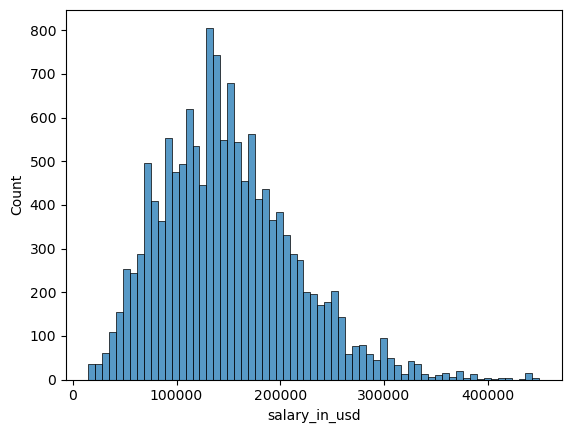

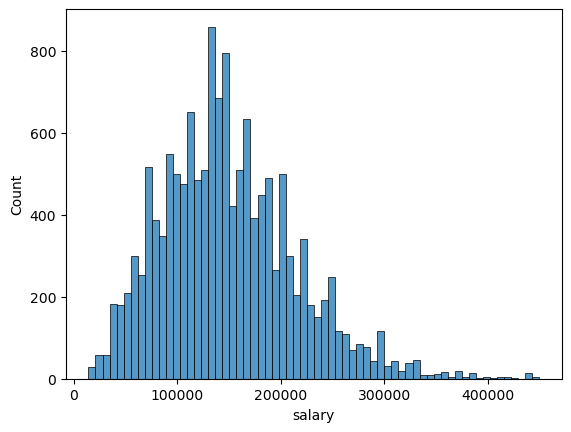

In [6]:
#| layout-ncol: 2
# show distribution for salary_in_usd
sns.histplot(job_df['salary_in_usd'])
plt.show()

# show distribution for salary
sns.histplot(job_df['salary'])
plt.show()

## 3: Data Extraction and Preparation

Due to categorical imbalances shown in the previous section, the dataset was filtered to only include employees residing in the U.S. (`employee_residence`), working for a U.S.-based company (`company_location`), and working full-time (`employment_type`). While this reduced the potential generalizability of findings, it was important to recognize that the data was already biased towards these groups, and any attempt to generalize beyond that would be undermined to begin with. Filtering for these categories reduced the number of observations to 12,389, which constituted less than 13% data loss. Features `work_setting` and `company_size` were not filtered to remedy categorical imbalances, as each feature contained only three levels, and the degree of the imbalance was less concerning. Potential outliers and skewness in `salary_in_usd` were not treated, as Random Forest models are robust to outliers and extreme values [@deori2023], and high salaries were potentially noteworthy in the RFR model.

Of the twelve original features, only four were kept for analyses: `experience_level`, `salary_in_usd`, `work_setting`, and `job_category`. After filtering for `employment_type`, `employee_residence`, `company_location`, these three features were excluded on the basis that each was no longer a variable (i.e., each only had one value). The feature `job_category` was used place of `job_title`, as the former had far lower cardinality (i.e., ten unique value vs. 149), making it far easier to incorporate in analyses. Filtering by country meant `salary_in_usd` could be used in place of `salary` and `salary_currency`, as conversions would not be necessary. Features `work_year` and `company_size` would have been nice to add to the salary estimation Random Forest Regression model, but both had sub-optimal distributions and level structures to analyze.

In [7]:
# create separate df for just US employees working for US companies
us_job_df = job_df.loc[(job_df['employee_residence'] == 'United States') & 
                       (job_df['company_location'] == 'United States')]

In [8]:
# filter df to only include full-time employees
us_job_df = us_job_df.loc[us_job_df['employment_type'] == 'Full-time']
print(us_job_df['employment_type'].value_counts())

employment_type
Full-time    12389
Name: count, dtype: int64


In [9]:
# reset index to align with observations
us_job_df.reset_index(inplace=True, drop=True)

In [10]:
# keep only relevant variables
refined_us_job_df = us_job_df[['experience_level', 'salary_in_usd', 'work_setting',
                               'job_category']]

### 3.A: Chi-Square Model Preparation

Initial cross tabulations characterized the expected frequencies of `experience_level` and `job_category` before running the Chi-Square model (see @tbl-exp-cts). The a-priori criteria defined in this project's proposal was that any job categories with fewer than five expected counts in any cell would be combined with other job categories meeting this criteria. Such low expected counts would be abnormally low for a dataset of this size, and collapsing categories can serve as a sound solution without incurring data loss [@bewick2003]. The job categories Cloud and Database, Data Management and Strategy, and Data Quality and Operations all had fewer than five expected counts for at least one experience level, leading these to be combined into one category (see @tbl-exp-cts-1). Rather than labeling this category as "Other," these categories all pertained to Data Management, which served as a more descriptive label (see @tbl-exp-cts-2). The final cross tabulation to be used in the Chi-Square analysis was saved as `trans_refined_ct`.

In [11]:
# create crosstab for experience_level and job_category, with margins
import statsmodels.api as sm
#pd.set_option('display.float_format', lambda x: '{0:.2f}' % x)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision', 3)

#pd.set_option('display.precision', 2)
cross_tab = pd.crosstab(refined_us_job_df['experience_level'], 
                        refined_us_job_df['job_category'], 
                        margins=True)

In [12]:
# obtain expected values for crosstab
expected_table = sm.stats.Table(cross_tab)
#expected_table.fittedvalues.round(2).T

In [13]:
# create copy before transforming levels
ct_us_job_df = refined_us_job_df.copy(deep=True)

In [14]:
# convert 3 levels to Data Management
ct_us_job_df.replace({'job_category': 
                      {'Cloud and Database': 'Data Management', 
                       'Data Management and Strategy': 'Data Management', 
                       'Data Quality and Operations': 'Data Management'}}, 
                      inplace=True)

In [15]:
# define and output new contingency table
refined_ct = pd.crosstab(ct_us_job_df['experience_level'], 
                         ct_us_job_df['job_category'])
refined_expected_table = sm.stats.Table(refined_ct)

In [16]:
# create expected table with margins
marginal_ct = pd.crosstab(ct_us_job_df['experience_level'], 
                          ct_us_job_df['job_category'], margins=True)
marginal_expected_table = sm.stats.Table(marginal_ct)

In [17]:
#| label: tbl-exp-cts
#| tbl-cap: Original and refined expected counts contingency tables.
#| layout-nrow: 2
# create rounded, transposed versions of tables
ct_exp_md = expected_table.fittedvalues.round(2).T
ct_ref_exp_md = marginal_expected_table.fittedvalues.round(2).T

# display markdown versions of tables
display(Markdown(ct_exp_md.to_markdown()))
display(Markdown(ct_ref_exp_md.to_markdown()))

| job_category                   |   Entry-level |   Executive |   Mid-level |   Senior |      All |
|:-------------------------------|--------------:|------------:|------------:|---------:|---------:|
| BI and Visualization           |         33.39 |       15.52 |      115.16 |   365.96 |   529.97 |
| Cloud and Database             |          0.72 |        0.34 |        2.5  |     7.94 |    11.5  |
| Data Analysis                  |        119.19 |       55.39 |      411.09 |  1306.42 |  1891.9  |
| Data Architecture and Modeling |         23.77 |       11.05 |       81.97 |   260.49 |   377.23 |
| Data Engineering               |        175.44 |       81.54 |      605.12 |  1923.03 |  2784.86 |
| Data Management and Strategy   |          6.13 |        2.85 |       21.13 |    67.15 |    97.25 |
| Data Quality and Operations    |          4.17 |        1.94 |       14.39 |    45.75 |    66.25 |
| Data Science and Research      |        260.55 |      121.1  |      898.66 |  2855.9  |  4135.79 |
| Leadership and Management      |         43.15 |       20.06 |      148.84 |   472.99 |   684.97 |
| Machine Learning and AI        |        114.02 |       52.99 |      393.27 |  1249.8  |  1809.91 |
| All                            |        780.46 |      362.73 |     2691.86 |  8554.57 | 12388.4  |

| job_category                   |   Entry-level |   Executive |   Mid-level |   Senior |      All |
|:-------------------------------|--------------:|------------:|------------:|---------:|---------:|
| BI and Visualization           |         33.38 |       15.5  |      115.16 |   365.97 |   529.99 |
| Data Analysis                  |        119.15 |       55.32 |      411.1  |  1306.46 |  1891.96 |
| Data Architecture and Modeling |         23.76 |       11.03 |       81.97 |   260.5  |   377.24 |
| Data Engineering               |        175.39 |       81.43 |      605.14 |  1923.09 |  2784.94 |
| Data Management                |         10.97 |        5.09 |       37.86 |   120.32 |   174.25 |
| Data Science and Research      |        260.48 |      120.93 |      898.69 |  2855.98 |  4135.92 |
| Leadership and Management      |         43.14 |       20.03 |      148.84 |   473    |   684.99 |
| Machine Learning and AI        |        113.99 |       52.92 |      393.29 |  1249.84 |  1809.96 |
| All                            |        780.23 |      362.24 |     2691.95 |  8554.83 | 12388.8  |

In [18]:
# save final contingency table for use in analyses
trans_refined_ct = refined_ct.T

### 3.B: Random Forest Regressor Model Preparation

#### 3.B.1: Encoding Section

Since scikit-learn's RFR implementation can only accept numeric features, predictors for the RFR model (`experience_level`, `work_setting`, and `job_category`) were transformed using a one-hot encoding (OHE) method. While added sparsity from OHE features can reduce model efficiency and performance [@ravi2022], other encoding methods that do not increase sparsity (e.g., integer or ordinal encoding) can create unintended relationships between feature levels [@brownlee2020]. Such ordered relationships would have been defensible for features `experience_level` and `work_setting`, but these were also encoded using an OHE method for consistency with the `job_category` feature. By using the `ColumnTransformer()` function to apply OHE, the target variable, `salary_in_usd`, was left unaffected, and the output was automatically transformed into a pandas dataframe. This resulted in seventeen OHE features, corresponding to the levels of `experience_level` (*n* = 4), `work_setting` (*n* = 3), and `job_category` (*n* = 10).

In [19]:
# import libraries necessary for transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
# get list of categorical columns to transform
cat_df = refined_us_job_df[['experience_level', 'work_setting', 'job_category']]
cat_cols = list(cat_df.keys())
print(cat_cols)

['experience_level', 'work_setting', 'job_category']


In [21]:
# define transformer with non-sparse output
cat_transformer = OneHotEncoder(sparse_output=False)

In [22]:
# apply transformer to cat_cols, while passing over salary_in_usd
ct = ColumnTransformer([('cat', cat_transformer, cat_cols)], remainder='passthrough')

In [23]:
# set output to pandas df and fit to data
ct.set_output(transform='pandas')
dc_us_job_df = ct.fit_transform(refined_us_job_df)
dc_us_job_df.columns

Index(['cat__experience_level_Entry-level', 'cat__experience_level_Executive',
       'cat__experience_level_Mid-level', 'cat__experience_level_Senior',
       'cat__work_setting_Hybrid', 'cat__work_setting_In-person',
       'cat__work_setting_Remote', 'cat__job_category_BI and Visualization',
       'cat__job_category_Cloud and Database',
       'cat__job_category_Data Analysis',
       'cat__job_category_Data Architecture and Modeling',
       'cat__job_category_Data Engineering',
       'cat__job_category_Data Management and Strategy',
       'cat__job_category_Data Quality and Operations',
       'cat__job_category_Data Science and Research',
       'cat__job_category_Leadership and Management',
       'cat__job_category_Machine Learning and AI',
       'remainder__salary_in_usd'],
      dtype='object')

#### 3.B.2: Feature Selection

Once the features were all in a numeric format, scikit-learn's `SelectKBest()` discerned which variables were significantly associated with salary (see @tbl-feat-select for a summary). The scoring function used was `f_regression()`, due to the target feature being continuous. Three features were not significantly associated with `salary_in_usd` at the *p* \< .05 level (`cat__work_setting_Hybrid`, `cat__job_category_Data Architecture and Modeling`, `cat__job_category_Cloud and Database`). These features were dropped from subsequent analyses, leaving a total of fourteen features.

In [24]:
# import libraries for feature selection
from sklearn.feature_selection import SelectKBest, f_regression

In [25]:
# create X and y arrays for feature selection and beyond
y = dc_us_job_df['remainder__salary_in_usd']
X = dc_us_job_df.drop(['remainder__salary_in_usd'], axis=1)
print(f'''X shape: {X.shape}, y shape: {y.shape}''')

X shape: (12389, 17), y shape: (12389,)


In [26]:
# create SelectKBest instance using f_regression on all features
feature_rank = SelectKBest(score_func=f_regression, k='all')
# fit to data
feature_rank.fit(X, y=y)

SelectKBest(k='all', score_func=<function f_regression at 0x320657ec0>)

In [27]:
#| label: tbl-feat-select
#| tbl-cap: Feature importances ranked by significance.
# create df to show features, F-scores, and p-values
feature_df = pd.DataFrame({'Feature': X.columns, 
                           'F-score': feature_rank.scores_.round(2), 
                           'P-value': feature_rank.pvalues_.round(3)})
# sort lowest p-values first 
feature_df = feature_df.sort_values(by='P-value', ascending=True)
display(Markdown(feature_df.to_markdown()))

|    | Feature                                          |   F-score |   P-value |
|---:|:-------------------------------------------------|----------:|----------:|
|  0 | cat__experience_level_Entry-level                |    643.87 |     0     |
| 14 | cat__job_category_Data Science and Research      |    321.51 |     0     |
| 13 | cat__job_category_Data Quality and Operations    |     53.27 |     0     |
| 12 | cat__job_category_Data Management and Strategy   |     97.05 |     0     |
|  9 | cat__job_category_Data Analysis                  |   1323    |     0     |
| 15 | cat__job_category_Leadership and Management      |     23.38 |     0     |
|  7 | cat__job_category_BI and Visualization           |     89.74 |     0     |
| 16 | cat__job_category_Machine Learning and AI        |    791.71 |     0     |
|  5 | cat__work_setting_In-person                      |     23.33 |     0     |
|  3 | cat__experience_level_Senior                     |    838.27 |     0     |
|  2 | cat__experience_level_Mid-level                  |    509.32 |     0     |
|  1 | cat__experience_level_Executive                  |    169.43 |     0     |
|  6 | cat__work_setting_Remote                         |     21.73 |     0     |
| 11 | cat__job_category_Data Engineering               |     10.23 |     0.001 |
|  4 | cat__work_setting_Hybrid                         |      2.18 |     0.14  |
| 10 | cat__job_category_Data Architecture and Modeling |      1.64 |     0.2   |
|  8 | cat__job_category_Cloud and Database             |      0.58 |     0.446 |

In [28]:
# drop non-significant p-values from features
X = X.drop(['cat__work_setting_Hybrid', 
            'cat__job_category_Data Architecture and Modeling', 
            'cat__job_category_Cloud and Database'], axis=1)

#### 3.B.3: Train-Test-Split

Following the conventions of machine learning best practices, the data for the RFR model was split into training and testing sets, with a ratio of 70:30 in favor of the training set. This ensures the RFR model can generalize beyond the data it trained on (i.e., to the testing set), since this resembles the type of predictive modeling paradigm wherein the predicted values are not available [@brownlee2020c]. This 70:30 split resulted in training sets with 8,672 observations and testing sets with 3,717 observations.

In [29]:
# create train and test arrays from X and y with 80% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, 
                                                    random_state=21)

In [30]:
# output dimensions of train and test sets 
print(f'''X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, 
      y_train shape: {y_train.shape}, y_test shape: {y_test.shape}''')

X_train shape: (8672, 14), X_test shape: (3717, 14), 
      y_train shape: (8672,), y_test shape: (3717,)


## 4: Analysis

### 4.A: Chi-Square Model

#### 4.A.1: Omnibus

The omnibus-level Chi-Square Test of Independence was statistically significant (*X^2^* = 1003.54, *p* \< .001). Thus, the null hypothesis was rejected, as the experience level composition of employees varied between job categories. This necessitated further post hoc testing to compare experience level composition between job categories.

In [31]:
# output omnibus Chi-Square result
from scipy.stats import chi2_contingency
result = chi2_contingency(trans_refined_ct)
print(f'''Statistic: {result.statistic}, P-value: {result.pvalue}''')

Statistic: 1003.5413047409224, P-value: 4.926315041672239e-199


#### 4.A.2: Post Hoc Tests

The post hoc tests were completed using code adapted from @neuhof2018, as this helped streamline the process for the 28 job category comparisons. Instead of printing these comparisons as in the original code, converting to and printing a dataframe yielded a cleaner output (see @tbl-chi-sig). Given the large dataset at hand, a more stringent Bonferroni correction was used to correct for alpha inflation [@jafari2019], as this method multiples the statistical significance by the number of comparisons made. Despite this, all 28 comparisons were statistically significant after the Bonferroni correction (Bonferroni-corrected *p*-range: *p* \< .001 - *p* = .001). Focusing instead on the magnitude of the effect size in terms of *X^2^*, the three strongest effects resulted from comparisons with Data Analysis (compared to Data Engineer, Machine Learning and AI, and Data Science and Research, respectively). The visualizations in the following suggest that Data Analysis had more Entry-level employees relative to the comparison categories.

In [32]:
# code adapted from Neuhof (2018)
from itertools import combinations

# gathering all combinations for post-hoc chi2
all_combinations = list(combinations(trans_refined_ct.index, 2))
chi2_vals = []
p_vals = []
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = trans_refined_ct[(trans_refined_ct.index == comb[0]) | 
                              (trans_refined_ct.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
    chi2_vals.append(chi2)
    p_vals.append(p)

In [33]:
#| label: tbl-chi-sig
#| tbl-cap: Job category comparisons ranked by Chi-Square statistic.
# create dataframe with combinations, effect sizes, and p-vals
chi2_df = pd.DataFrame({'Combination': all_combinations, 
                        'Statistic': chi2_vals, 
                        'p': p_vals})
# create Bonferroni-corrected p-values by multiplying by number of tests
chi2_df['p-Bonf'] = (chi2_df['p'] * 28).round(3)
chi2_df['Statistic'] = chi2_df['Statistic'].round(2)
chi2_df['p'] = chi2_df['p'].round(3)
# sort df by effect size 
chi2_df = chi2_df[['Combination', 'Statistic', 'p', 'p-Bonf']].sort_values(
by='Statistic', ascending=False)
# print as markdown
display(Markdown(chi2_df.to_markdown()))

|    | Combination                                                     |   Statistic |   p |   p-Bonf |
|---:|:----------------------------------------------------------------|------------:|----:|---------:|
|  8 | ('Data Analysis', 'Data Engineering')                           |      340.85 |   0 |    0     |
| 12 | ('Data Analysis', 'Machine Learning and AI')                    |      325.68 |   0 |    0     |
| 10 | ('Data Analysis', 'Data Science and Research')                  |      297.49 |   0 |    0     |
| 11 | ('Data Analysis', 'Leadership and Management')                  |      199.27 |   0 |    0     |
| 27 | ('Leadership and Management', 'Machine Learning and AI')        |      170.07 |   0 |    0     |
|  7 | ('Data Analysis', 'Data Architecture and Modeling')             |      156.55 |   0 |    0     |
| 14 | ('Data Architecture and Modeling', 'Data Management')           |      149.71 |   0 |    0     |
| 24 | ('Data Management', 'Machine Learning and AI')                  |      140.46 |   0 |    0     |
| 25 | ('Data Science and Research', 'Leadership and Management')      |      127.48 |   0 |    0     |
| 16 | ('Data Architecture and Modeling', 'Leadership and Management') |      122.45 |   0 |    0     |
|  1 | ('BI and Visualization', 'Data Architecture and Modeling')      |       96.26 |   0 |    0     |
| 18 | ('Data Engineering', 'Data Management')                         |       86.38 |   0 |    0     |
|  6 | ('BI and Visualization', 'Machine Learning and AI')             |       84.62 |   0 |    0     |
| 21 | ('Data Engineering', 'Machine Learning and AI')                 |       75.22 |   0 |    0     |
| 22 | ('Data Management', 'Data Science and Research')                |       73.34 |   0 |    0     |
| 13 | ('Data Architecture and Modeling', 'Data Engineering')          |       70.68 |   0 |    0     |
| 15 | ('Data Architecture and Modeling', 'Data Science and Research') |       63.27 |   0 |    0     |
| 23 | ('Data Management', 'Leadership and Management')                |       57.52 |   0 |    0     |
| 26 | ('Data Science and Research', 'Machine Learning and AI')        |       56.39 |   0 |    0     |
|  0 | ('BI and Visualization', 'Data Analysis')                       |       53    |   0 |    0     |
| 20 | ('Data Engineering', 'Leadership and Management')               |       50.03 |   0 |    0     |
| 19 | ('Data Engineering', 'Data Science and Research')               |       39.92 |   0 |    0     |
|  9 | ('Data Analysis', 'Data Management')                            |       30.91 |   0 |    0     |
|  5 | ('BI and Visualization', 'Leadership and Management')           |       29.99 |   0 |    0     |
|  2 | ('BI and Visualization', 'Data Engineering')                    |       27    |   0 |    0     |
|  3 | ('BI and Visualization', 'Data Management')                     |       25.48 |   0 |    0     |
|  4 | ('BI and Visualization', 'Data Science and Research')           |       22.98 |   0 |    0.001 |
| 17 | ('Data Architecture and Modeling', 'Machine Learning and AI')   |       22.92 |   0 |    0.001 |

#### 4.A.3: Chi-Square Visualizations

The contingency cross tabulation tables are shown below for the observed (see @tbl-ct-figs-1) and expected counts (see @tbl-ct-figs-2). Rather than focusing on these individually, a residual table was created to show observed counts deviated from the expected counts for each cell (see @tbl-ct-figs-3). Residuals were calculated as the difference between the observed and expected counts divided by the expected values ((O - E) / E), which yields both the direction and magnitude of difference between the two. The accompanying heatmap (see @fig-chi-heatmap) shows where counts were greater than expected in red (e.g., Entry-level and Data Analysis or Executive and Leadership and Management) and fewer than expected in blue (e.g., Entry-level and Data Architecture and Modeling or Executive and Data Management). The bivariate plots compare the experience level composition across job categories, using the proportion (@fig-chi-bivariate-1) and count of employees (@fig-chi-bivariate-2) with each experience level. @fig-chi-bivariate-1 re-iterates the findings that Data Analysis for Entry-level employees and Leadership and Management for Executive employees were relative peaks among less-represented experience levels. Conversely, Senior employees comprised a sizable portion of every job category, and the clear majority of a few (e.g., Data Architecture and Modeling, Machine Learning and AI). @fig-chi-bivariate-2 uses number of employees for the y-axis variable, which takes into account size differences between job categories. This again depicts the relative commonality of Senior employees, as three of four largest categories (Data Science and Research, Data Engineering, and Machine Learning and AI) contained a substantial number of Senior employees.

In [34]:
# set order of Chi-Square variables
# set experience order
experience_order = pd.CategoricalDtype(['Entry-level', 'Mid-level', 'Senior', 
                                        'Executive'], ordered=True)
ct_us_job_df.experience_level = ct_us_job_df.experience_level.astype(experience_order)
# set job category order to alphabetical
category_order = pd.CategoricalDtype(['BI and Visualization', 'Data Analysis', 
                                      'Data Architecture and Modeling', 
                                      'Data Engineering', 'Data Management', 
                                      'Data Science and Research', 
                                      'Leadership and Management', 
                                      'Machine Learning and AI'], ordered=True)
ct_us_job_df.job_category = ct_us_job_df.job_category.astype(category_order)

In [35]:
# create crosstabs without margins
observed_ct = pd.crosstab(ct_us_job_df['experience_level'],
                          ct_us_job_df['job_category'], margins=False)
expected_ct = sm.stats.Table(observed_ct)

In [36]:
# convert cts to dfs and transpose
expected_df = pd.DataFrame(expected_ct.fittedvalues).T
observed_df = pd.DataFrame(observed_ct).T

In [37]:
# run transformations to create residuals 
resid_div_ct_df = observed_df.subtract(expected_df)
resid_div_ct_df = resid_div_ct_df.divide(expected_df)

In [38]:
# round all dfs for better outputting
expected_df = expected_df.round(2)
observed_df = observed_df.round(2)
resid_div_ct_df = resid_div_ct_df.round(2)

In [39]:
#| column: body-outset
#| layout:
#|   - - 65
#|     - 35
#|   - - 100
#| label: tbl-ct-figs
#| tbl-cap: Contingency Tables

# display tables in markdown format
display(Markdown(observed_df.to_markdown()))
display(Markdown(expected_df.to_markdown(index=False)))
display(Markdown(resid_div_ct_df.to_markdown()))

| job_category                   |   Entry-level |   Mid-level |   Senior |   Executive |
|:-------------------------------|--------------:|------------:|---------:|------------:|
| BI and Visualization           |            37 |         150 |      325 |          18 |
| Data Analysis                  |           347 |         450 |     1075 |          20 |
| Data Architecture and Modeling |             0 |          34 |      339 |           4 |
| Data Engineering               |            95 |         623 |     1937 |         130 |
| Data Management                |            22 |          74 |       78 |           0 |
| Data Science and Research      |           216 |         866 |     2954 |         100 |
| Leadership and Management      |            16 |         216 |      393 |          60 |
| Machine Learning and AI        |            47 |         279 |     1454 |          30 |

|   Entry-level |   Mid-level |   Senior |   Executive |
|--------------:|------------:|---------:|------------:|
|         33.39 |      115.15 |   365.95 |       15.51 |
|        119.19 |      411.08 |  1306.38 |       55.36 |
|         23.78 |       82.02 |   260.65 |       11.04 |
|        175.44 |      605.1  |  1922.98 |       81.48 |
|         10.99 |       37.91 |   120.49 |        5.11 |
|        260.54 |      898.64 |  2855.81 |      121.01 |
|         43.15 |      148.83 |   472.98 |       20.04 |
|        114.02 |      393.26 |  1249.76 |       52.96 |

| job_category                   |   Entry-level |   Mid-level |   Senior |   Executive |
|:-------------------------------|--------------:|------------:|---------:|------------:|
| BI and Visualization           |          0.11 |        0.3  |    -0.11 |        0.16 |
| Data Analysis                  |          1.91 |        0.09 |    -0.18 |       -0.64 |
| Data Architecture and Modeling |         -1    |       -0.59 |     0.3  |       -0.64 |
| Data Engineering               |         -0.46 |        0.03 |     0.01 |        0.6  |
| Data Management                |          1    |        0.95 |    -0.35 |       -1    |
| Data Science and Research      |         -0.17 |       -0.04 |     0.03 |       -0.17 |
| Leadership and Management      |         -0.63 |        0.45 |    -0.17 |        1.99 |
| Machine Learning and AI        |         -0.59 |       -0.29 |     0.16 |       -0.43 |

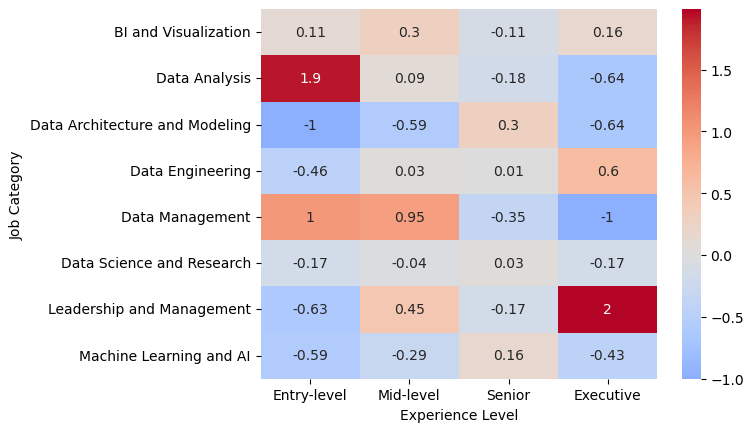

In [40]:
#| label: fig-chi-heatmap
#| fig-cap: "Chi-Square residual heatmap. Positive values denote greater observed counts than expected in red. Negative values denoting fewer observed counts than expected are shown in blue."
# show residuals using heatmap using blue and red colors, centering on 0
resid_heatmap = sns.heatmap(resid_div_ct_df, annot=True, cmap='coolwarm', center=0)
resid_heatmap.set(xlabel='Experience Level', ylabel='Job Category')
plt.show()

In [41]:
# reset experience_order to show experience vertically
experience_order = pd.CategoricalDtype(['Executive', 'Senior', 'Mid-level', 
                                        'Entry-level'], ordered=True)
ct_us_job_df.experience_level = ct_us_job_df.experience_level.astype(experience_order)

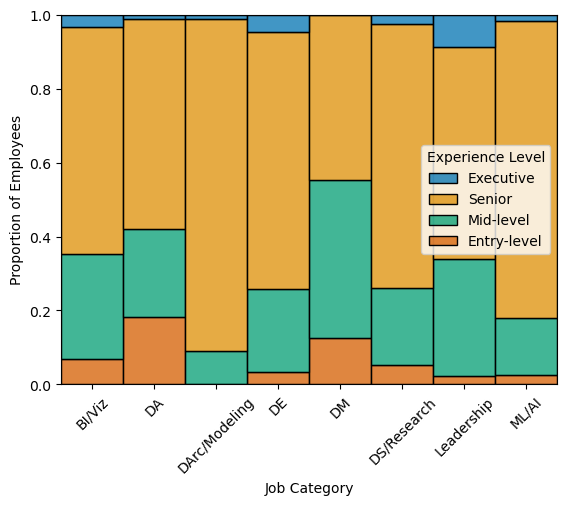

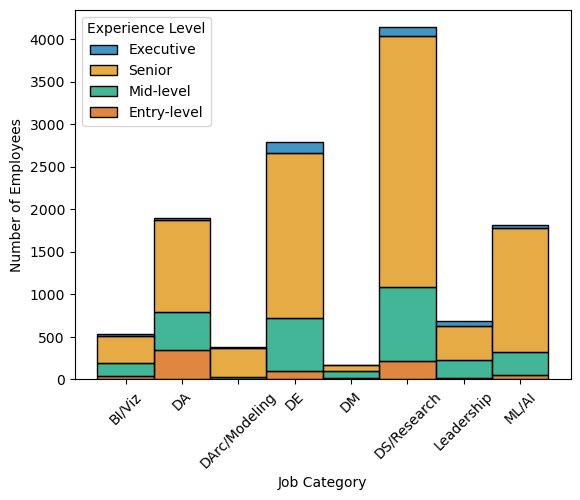

In [42]:
#| column: body-outset
#| label: fig-chi-bivariate 
#| fig-cap: "Experience level and job category composition. Abbreviations: BI/Viz: BI and Visualization; DA: Data Analysis; DArc/Modeling: Data Architecture and Modeling; DE: Data Engineering; DM: Data Management; DS/Research: Data Science and Research; Leadership: Leadership and Management; ML/AI: Machine Learning and AI."
#| fig-subcap: 
#|   - "Proportion of job category with each experience level."
#|   - "Number of employees with experience level across job categories."
#| layout-ncol: 2

# show bivariate plots for experience level and job category proportions and counts
with sns.color_palette('colorblind'):
    prop_hist = sns.histplot(data=ct_us_job_df, x='job_category', 
                             hue='experience_level', stat='proportion', 
                             multiple='fill', discrete=True)
    prop_hist.set_xticklabels(['BI/Viz', 'DA', 'DArc/Modeling', 'DE', 'DM', 
                               'DS/Research', 'Leadership', 'ML/AI'], rotation=45)
    prop_hist.set(xlabel='Job Category', ylabel='Proportion of Employees')#, 
                  #title='Experience Level Composition by Job Category')
    prop_hist.get_legend().set_title('Experience Level')
    plt.show()

    count_hist = sns.histplot(data=ct_us_job_df, x='job_category', 
                              hue='experience_level', multiple='stack')
    count_hist.set_xticklabels(['BI/Viz', 'DA', 'DArc/Modeling', 'DE', 'DM', 
                                'DS/Research', 'Leadership', 'ML/AI'], rotation=45)
    count_hist.set(xlabel='Job Category', ylabel='Number of Employees')
    count_hist.get_legend().set_title('Experience Level')
    plt.show()

### 4.B: Random Forest Regressor Model

#### 4.B.1: Grid Search for RFR

To create a more robust RFR model, hyperparameters of interest were tuned using `GridSearchCV` to evaluate hyperparameter combinations with the training data. The parameter grid was constructed using guidelines from @ellis2022, specifying values in a reasonable range for `n_estimators`, `max_features`, and one parameter to limit tree depth (e.g., `max_depth`). With root-mean-squared error (*RMSE*) as the a-priori error metric for the RFR model, the scoring metric for the grid search object was set to `neg_root_mean_squared_error`. This grid search object was supplied a default RFR model and the parameter grid, and subsequently fit to the `X_train` and `y_train` datasets for five cross-validation folds. The resulting best parameters were `max_depth` = 8, `max_features` = 'sqrt', and `n_estimators` = 50, which were used with the models in the next section (see section [4.B.2: Train and Test Model Performance]).

In [43]:
# import libraries necessary for hyperparameter tuning
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [44]:
# define MSE for later use
MSE = metrics.mean_squared_error

In [45]:
# instantiate baseline model
rf_model = RandomForestRegressor(random_state=21)

In [46]:
# construct parameter grid to for hyperparameters of interest
param_grid = {'n_estimators': [50, 100, 200, 400], 
              'max_depth': [2, 4, 8, None],
              'max_features': ['sqrt', 'log2', None]
              }

In [47]:
# fit GridSearchCV to rf_model with param_grid and scoring as negative RMSE
gs_rf = GridSearchCV(rf_model, param_grid=param_grid, 
                     scoring='neg_root_mean_squared_error', cv=5)

In [48]:
# fit grid search object to data
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=21),
             param_grid={'max_depth': [2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='neg_root_mean_squared_error')

In [49]:
# output best parameters from grid search
print(gs_rf.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}


#### 4.B.2: Train and Test Model Performance

The training model performance was evaluated from the grid search object directly, from which the *RMSE* and *R^2^* values were extracted. The final RFR model was created with tuned hyperparameters and fit to `X_train` and `y_train`, and subsequently used to predict `y_test` using `X_test`. Model performance was comparable in the training (*RMSE* = 53,050.72, *R^2^* = .2448) and testing models (*RMSE* = 54,352.70, *R^2^* = .2525). The testing model performance indicates that the features explained roughly 25% of the variance in salary, and the salary estimates were off by roughly \$54,000 on average. The convergence between the error and explained variance metrics between the training and testing models suggest the model was not overfit to the training data.

In [50]:
# get RMSE and R2 from best grid search model (training)
grid_rmse = (gs_rf.best_score_ * -1)
print('Training RMSE: ', round(grid_rmse, 2))
grid_predict = gs_rf.predict(X_train)
print('Training R-Squared: ', round(metrics.r2_score(y_true=y_train, 
      y_pred=grid_predict), 4))

Training RMSE:  53050.72
Training R-Squared:  0.2448


In [51]:
# define final RFR model with best parameters
rfr_model = RandomForestRegressor(max_depth=8, 
                                  max_features='sqrt', 
                                  n_estimators=50, 
                                  random_state=21)

In [52]:
# fit final model to X_train and y_train
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=50,
                      random_state=21)

In [53]:
# using that RFR model, predict y_test using X_test
y_test_pred = rfr_model.predict(X_test)

In [54]:
# get RMSE and R2 values from test model
test_RMSE = np.sqrt(MSE(y_test, y_test_pred))
test_R2 = metrics.r2_score(y_test, y_test_pred)
print('Test RMSE: ', round(test_RMSE, 2))
print('Test R-Squared: ', round(test_R2, 4))

Test RMSE:  54352.7
Test R-Squared:  0.2525


#### 4.B.3: Feature Importances and Tree Diagram

Feature importances were extracted from the RFR model, converted to a dataframe, and sorted in descending order (see @tbl-feature-imps). The values ranged from .008 to .286, with all features explaining at least some variance, and the magnitude gradually decreasing with each subsequent feature (see @fig-feat-imp). The top three features included the Data Analysis job category (.286), Machine Learning and AI job category (.162), and Senior experience level (.136). Unsurprisingly, these were the first three features used to split the data in the RFR tree diagram (see @fig-tree-three), which underscores each feature's importance to estimating salary. The code for this diagram was adapted from a TensorFlow tutorial [@visualiz2024], and this figure makes it easy to interpret how the absence or presence of an experience level, job category, or work setting altered the RFR model's salary estimate. With the depth of the model, however, only the first three levels of the diagram could be displayed before the clarity of the figure diminished.

In [55]:
#| label: tbl-feature-imps
#| tbl-cap: Sorted feature importances in Random Forest model. 
# create df for features and corresponding importances 
feature_df = pd.DataFrame({'Feature': X.columns, 
                           'Importance': rfr_model.feature_importances_})
# sort the values with higher importances first
feature_df['Importance'] = feature_df['Importance'].round(3)
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# display sorted df as markdown
display(Markdown(feature_df.to_markdown()))

|    | Feature                                        |   Importance |
|---:|:-----------------------------------------------|-------------:|
|  7 | cat__job_category_Data Analysis                |        0.286 |
| 13 | cat__job_category_Machine Learning and AI      |        0.162 |
|  3 | cat__experience_level_Senior                   |        0.136 |
|  0 | cat__experience_level_Entry-level              |        0.082 |
|  2 | cat__experience_level_Mid-level                |        0.082 |
| 11 | cat__job_category_Data Science and Research    |        0.079 |
|  1 | cat__experience_level_Executive                |        0.056 |
|  6 | cat__job_category_BI and Visualization         |        0.028 |
|  8 | cat__job_category_Data Engineering             |        0.022 |
|  9 | cat__job_category_Data Management and Strategy |        0.02  |
|  5 | cat__work_setting_Remote                       |        0.015 |
|  4 | cat__work_setting_In-person                    |        0.013 |
| 12 | cat__job_category_Leadership and Management    |        0.012 |
| 10 | cat__job_category_Data Quality and Operations  |        0.008 |

In [56]:
# create split version of encoded feature names
feature_df['sep_Variable'] = feature_df['Feature'].str.split(r'_', regex=True,
                                                              expand=False)
# take last portion of the split for cleaner feature names
feature_df['short_Variable'] = feature_df['sep_Variable'].str[-1]

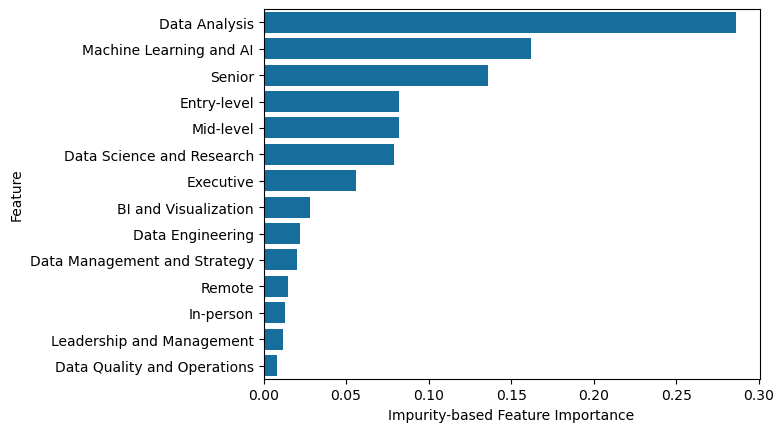

In [57]:
#| label: fig-feat-imp
#| fig-cap: Feature importances in Random Forest model. 
# visualize feature importances in descending order 
with sns.color_palette('colorblind'):
    feature_bar = sns.barplot(data=feature_df, x='Importance', y='short_Variable')
    feature_bar.set(xlabel='Impurity-based Feature Importance', ylabel='Feature')
    plt.show()

In [58]:
#| column: body
#| label: fig-tree-three
#| fig-cap: Tree diagram from Random Forest model. Only the first three levels are shown to preserve figure clarity.
# code adapted from Visualizing TensorFlow Decision Trees with Dtreeviz (2024)
import dtreeviz

# create dtreeviz model from RFR model
viz_rfr_model = dtreeviz.model(rfr_model.estimators_[0], X, y, 
                               tree_index=3,
                               feature_names=feature_df['short_Variable'], 
                               target_name='Salary')
# only show first three levels of depth for sake of clarity
viz_rfr_model.view(depth_range_to_display=[0,2], scale=1.2)

## 5: Data Summary and Implications

The results of the Chi-Square Test of Independence were statistically significant (see section [4.A.1: Omnibus]), thus rejecting the null hypothesis that the experience level of employees did not vary between job categories (see section [1.1: Research Question and Hypotheses]). With regards to this study's research question, experience level composition varied between job categories, which suggests that some data science positions are typically held by more experienced employees than others. One limitation of using a Chi-Square test with this data was that it may have been overpowered, as all job category post hoc comparisons exhibited significant differences, even following a Bonferroni correction (see section [4.A.2: Post Hoc Tests]). This shifted the focus from statistical significance of the comparisons to the magnitude of the effects, as quantified by the *X^2^* values and the residuals, (see section [4.A.3: Chi-Square Visualizations] for visualizations). Both metrics converged to suggest the Data Analysis job category was unique in its distribution of experience levels, which featured the highest proportion of entry-level employees.

While the RFR model was not intended to test or evaluate hypotheses, the final model performed relatively well considering the challenges of the data (see section [4.B.2: Train and Test Model Performance]). The features accounted for more than one-quarter of the variance in salary, which is impressive considering the fourteen encoded features originated from only three features. One limitation described in section [3.B.1: Encoding Section] was the use of sparse categorical data in the RFR model, which has been shown to diminish performance or interpretability in some Random Forest models [@ravi2022]. Interestingly, the RFR testing model performance (*R^2^*) outperformed the training model slightly (.2525 compared to .2448), which was unexpected. This can likely be attributed to the idiosyncratic, random nature of the train-test-split function (see section [3.B.3: Train-Test-Split]), which may have given the testing set a slightly "easier" dataset to predict. Since the training model had a better *RMSE* value than the testing set (53,050.72 compared to 54,352.70), the training model still estimated salary better than the testing set, and the unexpected *R^2^* comparison is likely not concerning.

The results of this study may be helpful for characterizing the field of data science at large. Firstly, the analyses using the data at hand suggest that entry-level positions are relatively rare in data science. This may lend credence to the idea that fewer entry-level positions are available in the field [@selvaraj2022], although, further studies should investigate this claim. The relative spike of entry-level employees in the data analysis job category supports multiple resources cited here [@selvaraj2022; @simmons2023]. Each of these suggested a data analyst position may be an intermediate step for an entry-level employee to become a data scientist, and the results of this study suggest this may be plausible. Lastly, the results of the RFR model suggest some experience levels, job categories, and work settings tend to earn a higher salary than others. Notably, employees in the Data Analysis job category tended to earn less, whereas Senior employees, or employees in the Machine Learning and AI job category tended to earn more.

Four considerations for future studies examining the field of data science are recommended following analyses here. One technical improvement would be to use an RFR model with non-sparse categorical features, to see if this potentially improves model performance or interpretability. An alternative to the scikit-learn workflow is the Distributed Random Forest model from @distribu2024, which can incorporate nominal feature structures without requiring transformations. Concerning the association between experience level and job category, obtaining each employee's entry-level position to data science would help create more holistic, trajectory-based snapshots of data science careers. This could also disentangle whether some roles with higher proportions of entry-level employees (e.g., Data Analysis) could feasibly serve as an intermediate step to another position [@selvaraj2022; @simmons2023]. Concerning the RFR model, including more features that might be associated with data science salaries (e.g., education level, years of employment, or geographic location) could improve salary estimates and model performance. Lastly, acquiring more stratified data with respect to employee status, employee residence, and company location would help generalize analyses beyond full-time employees, residing in the U.S., and working for a U.S.-based company.

{{< pagebreak >}}

## References

::: {#refs}
:::